# Using the modelr API

Obtaining significant numbers of 3-D geomodels for use as training data for developing and testing machine learning algorithms is hard. Training on real data inherently comes with the baggage of interpretation and model creation uncertainty (e.g. Bond et al. 2007, Bond 2015, Schaaf & Bond 2019, Wellmann & Caumon 2018). Synthetic training data can be a very useful to systematically train and test algorithms, but generating large amounts of geologically valid 3-D geomodels is also hard. 

In [53]:
import requests  # for HTML requests
from urlpath import URL  # for convenient URL handling
import numpy as np  # for numerical computation
import matplotlib.pyplot as plt  # for plotting
plt.rcParams["figure.figsize"] = (15,5)
import json  # for handling the JSON returned by the API

## Sampling geomodels from the API

You can find the interactive API documentation at localhost:8000/docs

In [54]:
api = URL('http://127.0.0.1:8000')

### Sections

You can sample sections through the probabilistic geomodel by sending a `get` request (i.e. just going to the URL) to `/sample/<seed>/<direction>`, where `<seed>` is a random seed to and `<direction>` is the direction along which to slice the geomodel.

* `seed` needs to be a whole number (an `int`)
* `direction` can be either `x`, `y` or `z`

By providing a random seed, you generate a reproducible sample from the probabilistic geomodel.

You can use the `requests` library for making the request:

http://127.0.0.1:8000/sample/42/y

In [55]:
r = requests.get(api / 'sample/42/y')

And then convert the request response into JSON, represented as a dictionary in Python, and get the geomodel section. The section is stored as a nested JavaScript Array (i.e. a nested Python `list`) which can be easily converted to a `numpy.ndarray`.

In [56]:
section = np.array(r.json().get('section'))

Which can then be easily plotted using `matplotlib`:

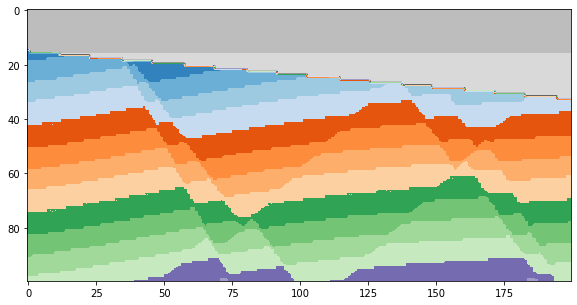

In [57]:
plt.imshow(section, cmap="tab20c")

## Parameters

### Cubesize

You can change the model resolution using the `cubesize` parameter and appending it to the `get` request. The larger the cube size, the lower the resolution of the model.

A coarse model with `cubesize=200`:

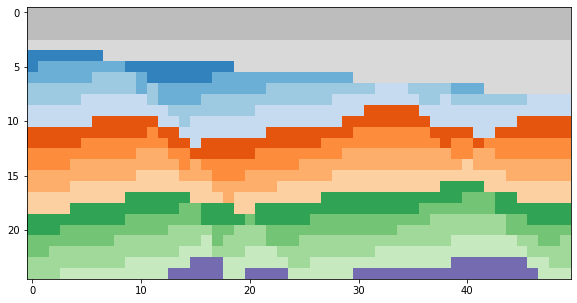

In [58]:
r = requests.get(api / 'sample/42/y?cubesize=200')
section = np.array(r.json().get('section'))

plt.imshow(section, cmap="tab20c")

And a fine model with `cubesize=20`:

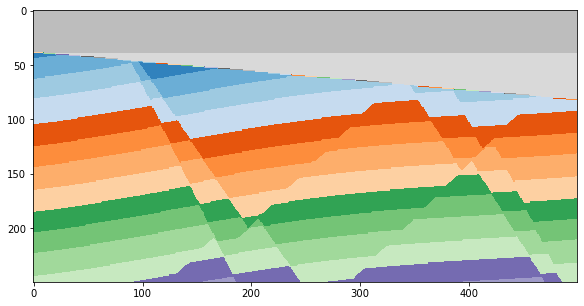

In [59]:
r = requests.get(api / 'sample/42/y?cubesize=20')
section = np.array(r.json().get('section'))

plt.imshow(section, cmap="tab20c")

### Position

By default the section gets extracted in the center of the geomodel along the specified axis. This can be adjusted to any position in the geomodel using the `position` parameter:

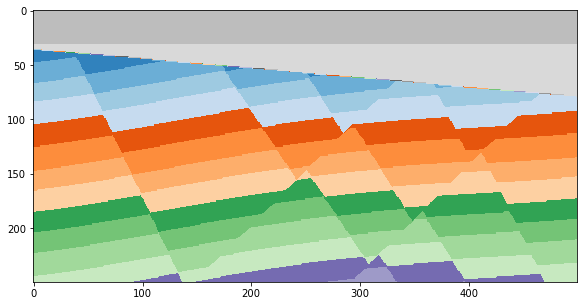

In [615]:
r = requests.get(api / 'sample/42/y?position=0&cubesize=20')
section = np.array(r.json().get('section'))

plt.imshow(section, cmap="tab20c")

### Fault labels

We can also query the fault labels

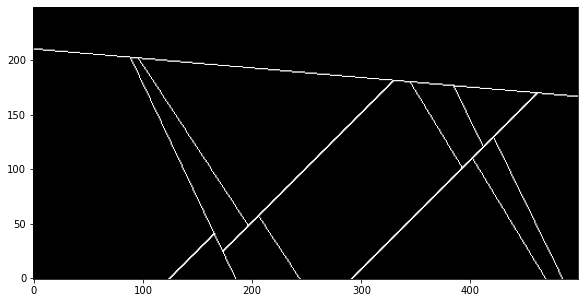

In [60]:
r = requests.get(api / 'sample/42/y?faultblock=true&faultlabels=true&cubesize=20&faultdiff=1')
faultlabels = np.array(r.json().get("faultlabels"))

plt.imshow(faultlabels, origin="lower", cmap="Greys_r")

<div class="alert alert-block alert-warning"><b>The fault labels array is created using shifted differences, thus the resulting labels array is smaller than the geomodel array (by default 1 element per dimension).</b> You can decide how to handle this: e.g. cut the geomodel down to the same size, pad the fault labels array, or other solutions.</div>

## Lithology information

In [61]:
lithologies = r.json().get('lithologies')
lithologies

['Shale',
 'Black Shale',
 'Coal',
 'Shale',
 'Shale',
 'Sandstone',
 'Shale',
 'Evaporite',
 'Limestone',
 'Coal',
 'Shale',
 'Sandstone',
 'Evaporite',
 'Siltstone',
 'Limestone',
 'Limestone',
 'Coal',
 'Limestone',
 'Shale',
 'Sandstone',
 'Limestone',
 'Limestone',
 'Siltstone',
 'Siltstone',
 'Black Shale',
 'Evaporite',
 'Shale',
 'Limestone',
 'Limestone',
 'Sandstone',
 'Black Shale',
 'Evaporite',
 'Black Shale',
 'Coal',
 'Evaporite',
 'Limestone',
 'Limestone',
 'Evaporite',
 'Limestone',
 'Shale',
 'Evaporite',
 'Black Shale',
 'Evaporite',
 'Limestone',
 'Shale',
 'Shale',
 'Coal',
 'Black Shale',
 'Siltstone',
 'Siltstone',
 'Evaporite',
 'Coal',
 'Sandstone',
 'Evaporite',
 'Coal',
 'Black Shale',
 'Black Shale',
 'Black Shale',
 'Black Shale',
 'Black Shale',
 'Coal',
 'Coal',
 'Shale',
 'Siltstone',
 'Limestone',
 'Black Shale',
 'Sandstone',
 'Limestone',
 'Coal',
 'Sandstone',
 'Sandstone',
 'Sandstone',
 'Shale',
 'Coal',
 'Sandstone',
 'Black Shale',
 'Evaporite',

## Rock properties

http://127.0.0.1:8000/rocklibrary

In [62]:
r_library = requests.get(api / 'rocks')
print(json.dumps(r_library.json().get("library"), indent=2))

[
  {
    "name": "Sandstone",
    "density": 2600,
    "color": "#FFCC00",
    "vp": 2700
  },
  {
    "name": "Siltstone",
    "density": 2550,
    "color": "#bca64f",
    "vp": 2450
  },
  {
    "name": "Shale",
    "density": 2450,
    "color": "#b8e07b",
    "vp": 2500
  },
  {
    "name": "Black Shale",
    "density": 2450,
    "color": "#454545",
    "vp": 2300
  },
  {
    "name": "Evaporite",
    "density": 1650,
    "color": "#b8b8b8",
    "vp": 2700
  },
  {
    "name": "Coal",
    "density": 1300,
    "color": "#539f6c",
    "vp": 2300
  },
  {
    "name": "Limestone",
    "density": 2550,
    "color": "#3399CC",
    "vp": 2450
  }
]


In [63]:
rocks = r_library.json().get("library")
rocks

[{'name': 'Sandstone', 'density': 2600, 'color': '#FFCC00', 'vp': 2700},
 {'name': 'Siltstone', 'density': 2550, 'color': '#bca64f', 'vp': 2450},
 {'name': 'Shale', 'density': 2450, 'color': '#b8e07b', 'vp': 2500},
 {'name': 'Black Shale', 'density': 2450, 'color': '#454545', 'vp': 2300},
 {'name': 'Evaporite', 'density': 1650, 'color': '#b8b8b8', 'vp': 2700},
 {'name': 'Coal', 'density': 1300, 'color': '#539f6c', 'vp': 2300},
 {'name': 'Limestone', 'density': 2550, 'color': '#3399CC', 'vp': 2450}]

We can use this to generate an impedence dictionary that can be used to map acoustic impedence values to lithology names:

In [64]:
impedence_map = {
    rock['name']:rock['density'] * rock['vp'] for rock in rocks
}
impedence_map

{'Sandstone': 7020000,
 'Siltstone': 6247500,
 'Shale': 6125000,
 'Black Shale': 5635000,
 'Evaporite': 4455000,
 'Coal': 2990000,
 'Limestone': 6247500}

And use the impedence map and the lithologies array 

In [65]:
impedence = np.array([impedence_map[l] for l in lithologies])
impedence

array([6125000, 5635000, 2990000, 6125000, 6125000, 7020000, 6125000,
       4455000, 6247500, 2990000, 6125000, 7020000, 4455000, 6247500,
       6247500, 6247500, 2990000, 6247500, 6125000, 7020000, 6247500,
       6247500, 6247500, 6247500, 5635000, 4455000, 6125000, 6247500,
       6247500, 7020000, 5635000, 4455000, 5635000, 2990000, 4455000,
       6247500, 6247500, 4455000, 6247500, 6125000, 4455000, 5635000,
       4455000, 6247500, 6125000, 6125000, 2990000, 5635000, 6247500,
       6247500, 4455000, 2990000, 7020000, 4455000, 2990000, 5635000,
       5635000, 5635000, 5635000, 5635000, 2990000, 2990000, 6125000,
       6247500, 6247500, 5635000, 7020000, 6247500, 2990000, 7020000,
       7020000, 7020000, 6125000, 2990000, 7020000, 5635000, 4455000,
       7020000, 6125000, 6247500, 2990000, 6125000, 7020000, 2990000,
       4455000, 7020000, 6247500, 6247500, 6247500, 5635000, 6247500,
       6247500, 2990000, 5635000, 2990000, 6247500, 6247500, 2990000,
       6247500, 5635

In [66]:
velocity_model = impedence[section - 1]

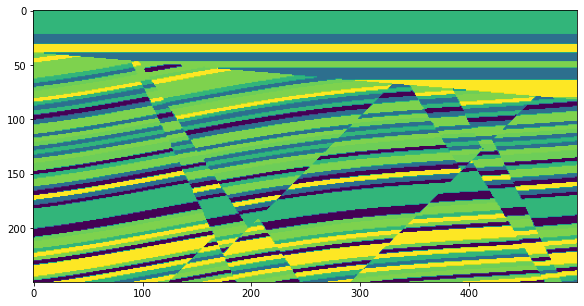

In [67]:
plt.figure(figsize=(15,5))
plt.imshow(velocity_model)

## Reflection coefficient

In [68]:
def reflection_coefficient(velocity_model: np.ndarray) -> np.ndarray:
    """
    Calculate the reflection coefficient array from a velocity
    model array.
    
    Args:
        velocity_model (np.ndarray): Velocity model.
        
    Returns:
        [np.ndarray] Reflection coefficient array.
    """
    upper, lower = velocity_model[:-2][:], velocity_model[2:][:]
    return (lower - upper) / (lower + upper)

In [69]:
rc = reflection_coefficient(velocity_model)

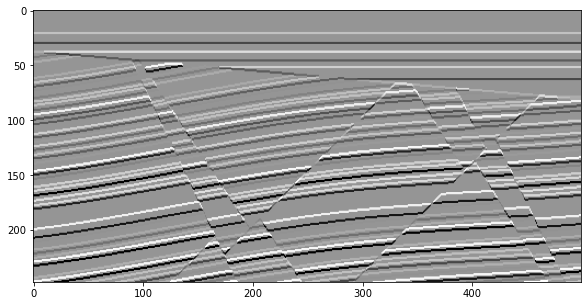

In [70]:
plt.figure(figsize=(15,5))
plt.imshow(rc, cmap="Greys")

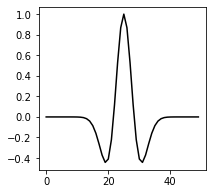

In [71]:
import bruges
wavelet = bruges.filters.ricker(duration=0.200, dt=0.004, f=17)

plt.figure(figsize=(3,3))
plt.plot(wavelet, c="k")

In [72]:
import scipy.ndimage
def convolution(rc: np.array, wavelet: bruges.filters.ricker, noise=0) -> np.array:
    seismic = np.apply_along_axis(
        lambda t: np.convolve(t, wavelet, mode='same'),
        axis=0, arr=rc + noise
    )
    return seismic

In [73]:
seismic = convolution(rc, wavelet)

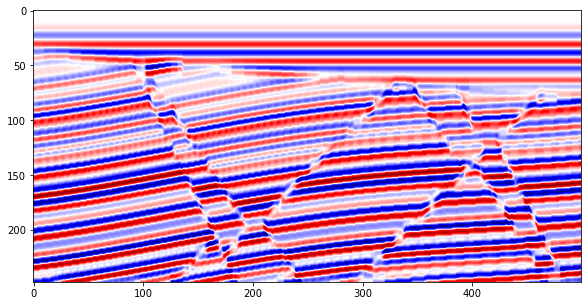

In [74]:
plt.imshow(seismic, cmap="seismic", interpolation="bicubic")

Now this looks like the most pristine seismic section nobody has ever seen. In reality, we have to deal with noisy seismic data, oftentimes incredibly noisy.

## Adding "realism": Noise

We can add simulated noise to our seismic forward modeling by generating random numbers. The most straight forward way of generating noise is to generate Gaussian (or Normal) Noise---by sampling a value from a Gaussian (Normal) distribution for each "pixel" in our geomodel/velocity model.

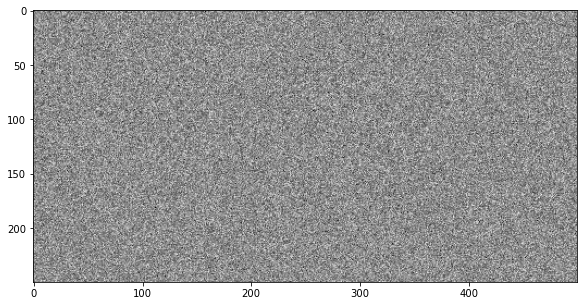

In [75]:
gaussian_noise = np.random.randn(*velocity_model.shape)  # generate gaussian noise

plt.imshow(gaussian_noise, cmap="Greys")

And by flattening the above 2D noise array and plotting its values in a histogram we can see, that the distribution of values looks like Gaussian (Normal) distribution:

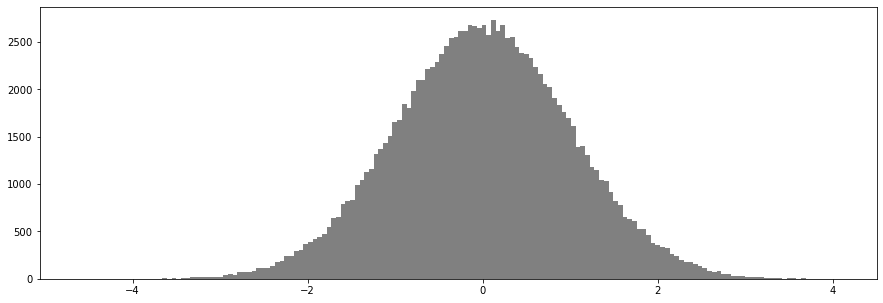

In [76]:
plt.hist(gaussian_noise.flatten(), bins="auto", color="grey");

We can now add this noise into our forward simulation worklow - for example to our velocity model. `np.random.randn` samples values closely around zero - so we need to scale our noise to a similar order of magnitude as our velocity model.

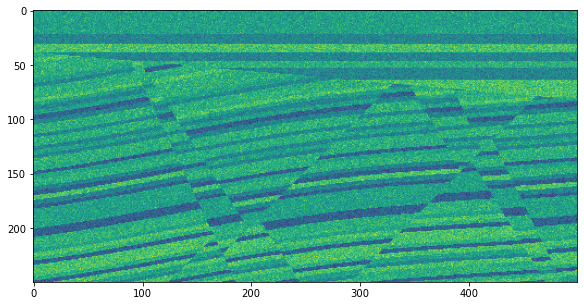

In [78]:
noise_scaling = 750000
velocity_model = impedence[section - 1] + gaussian_noise * noise_scaling

plt.imshow(velocity_model)

In [79]:
rc = reflection_coefficient(velocity_model)

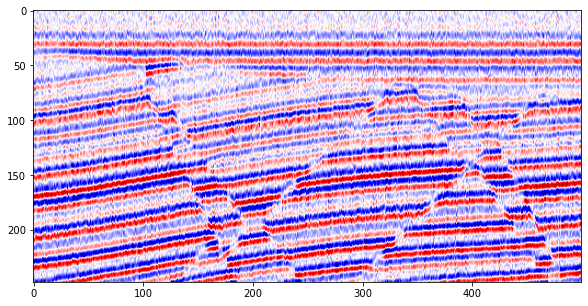

In [80]:
seismic = convolution(rc, wavelet)

plt.imshow(seismic, cmap="seismic")

Now this looks noisy, but unlike any seismic I've ever seen. Maybe we can improve the outcome by simulating some sort of spatial continuity in our noise. An easy way to do this is by blurring our noise array. We can do this here using `scipy`'s [Gaussian blur filter](https://en.wikipedia.org/wiki/Gaussian_blur).

In [81]:
from scipy.ndimage import gaussian_filter

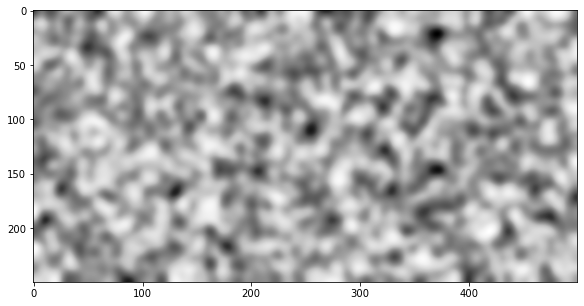

In [82]:
blurred_gnoise = gaussian_filter(gaussian_noise, 5)

plt.imshow(blurred_gnoise, cmap="Greys")

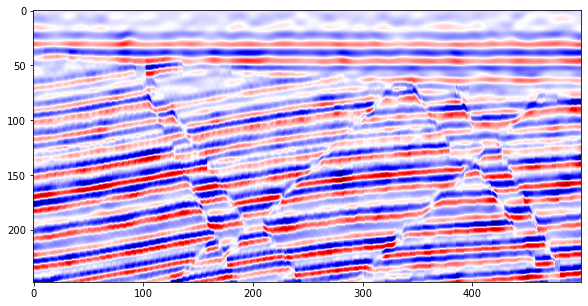

In [83]:
noise_scaling = 15000000
velocity_model = impedence[section - 1] + blurred_gnoise * noise_scaling
rc = reflection_coefficient(velocity_model)
seismic = convolution(rc, wavelet)

plt.imshow(seismic, cmap="seismic")

## Making the noise more "realistic": Perlin noise

In [86]:
from noise import pnoise2


def generate_perlin_noise(
    shape: tuple, scale: int = 15, octaves: int = 6, persistence: float = 0.5, lacunarity: float = 2.0
) -> np.ndarray:
    """Perlin noise array generator function.

    Args:
        shape (tuple): Shape of the output noise array.
        scale (int, optional): [description]. Defaults to 15.
        octaves (int, optional): [description]. Defaults to 6.
        persistence (float, optional): [description]. Defaults to 0.5.
        lacunarity (float, optional): [description]. Defaults to 2.0.

    Returns:
        [np.ndarray]: Normalized Perlin noise array of given shape.
        
    Modified from:
        https://github.com/pvigier/perlin-numpy
    """
    perlin = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            perlin[i][j] = pnoise2(
                i / scale,
                j / scale,
                octaves=octaves,
                persistence=persistence,
                lacunarity=lacunarity,
                repeatx=1024,
                repeaty=1024
            )
    min_, max_ = np.min(perlin), np.max(perlin)
    norm_perlin = (perlin - min_) / (max_ - min_)
    return norm_perlin

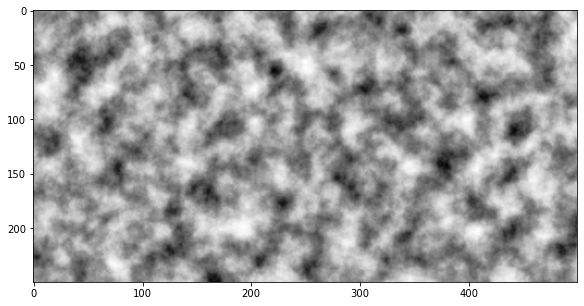

In [87]:
perlin_noise = generate_perlin_noise(section.shape, scale=30)

plt.imshow(perlin_noise, cmap="Greys")

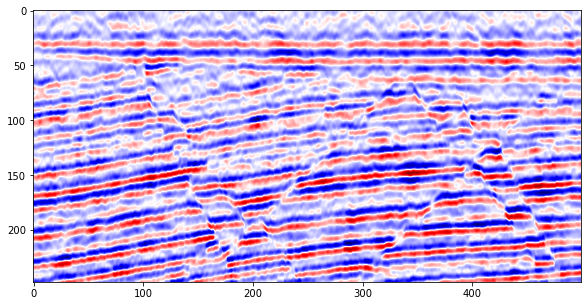

In [92]:
noise_scaling = 9000000
velocity_model = impedence[section - 1] + perlin_noise * noise_scaling
rc = reflection_coefficient(velocity_model)
seismic = convolution(rc, wavelet)

plt.imshow(seismic, cmap="seismic", interpolation="bicubic")

There are probably infinitely more ways of perturbing the forward simulation workflow with noise, but this looks already passable for a quick and easy seismic forward simulation.

# Creating a synthetic dataset

Now that we've defined our workflow, we can generate a set of random seeds and wrap the geomodel sampling and seismic forward simulation in a loop to generate as many samples as we might need.

In [93]:
np.random.seed(42)
seeds = np.random.randint(0, 100000, size=7)
seeds

array([15795,   860, 76820, 54886,  6265, 82386, 37194])

In [95]:
import tqdm  # progress bar for the loop

seismics = []
faultlabels = []
cubesize = 20

for seed in tqdm.tqdm(seeds):
    r = requests.get(
        api / f'sample/{seed}/y?cubesize={cubesize}&faultblock=true&faultlabels=true'
    )
    section = np.array(r.json().get('section'))
    lithologies = r.json().get('lithologies')
    labels = r.json().get('faultlabels')  # getting the fault labels
    faultlabels.append(np.array(labels))  # and storing them as numpy arrays
    
    acoustic_impedence = np.array([impedence_map[l] for l in lithologies])
    velocity_model = acoustic_impedence[section - 1]
    
    rc = reflection_coefficient(velocity_model)
    
    wavelet = bruges.filters.ricker(duration=0.200, dt=0.004, f=15)
    
    noise = generate_perlin_noise(rc.shape) * 0.2
    
    seismic = convolution(rc, wavelet, noise=noise)  # here we add the noise to the reflection coefficient
    seismics.append(seismic)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:31<00:00,  4.57s/it]


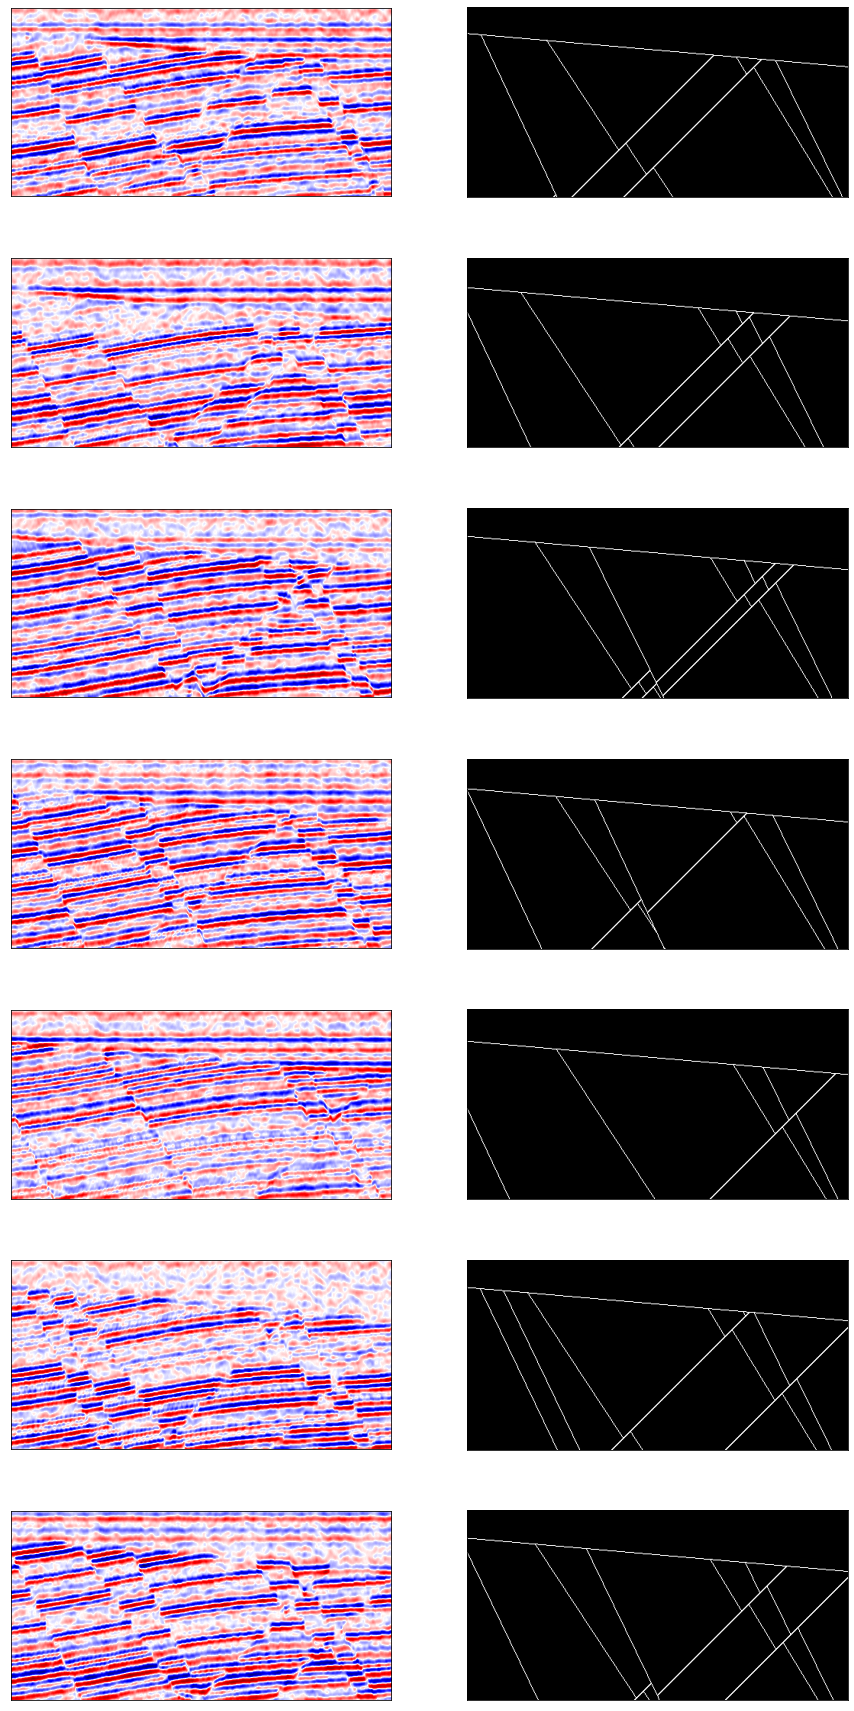

In [96]:
vmin, vmax = np.min(seismics), np.max(seismics)

fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(15,7*4.5))
for (ax1, ax2, synth, labels) in zip(axes[:, 0], axes[:, 1], seismics, faultlabels):
    ax1.imshow(synth, cmap="seismic", interpolation="bicubic", vmin=vmin, vmax=vmax)
    ax1.set_yticks([]); ax1.set_xticks([])
    
    ax2.imshow(labels, origin="lower", cmap="Greys_r")
    ax2.set_yticks([]); ax2.set_xticks([])

# References

* Bond, C. E., Gibbs, A. D., Shipton, Z. K., & Jones, S. (2007). <b>What do you think this is?``Conceptual uncertainty''in geoscience interpretation</b>. GSA today, 17(11), 4.
* Bond, C. E. (2015). <b>Uncertainty in structural interpretation: Lessons to be learnt</b>. Journal of Structural Geology, 74, 185-200.
* Schaaf, A., & Bond, C. E. (2019). <b>Quantification of uncertainty in 3-D seismic interpretation: implications for deterministic and stochastic geomodeling and machine learning</b>. Solid earth.
* Wellmann, F., & Caumon, G. (2018). <b>3-D Structural geological models: Concepts, methods, and uncertainties</b>. In Advances in Geophysics (Vol. 59, pp. 1-121). Elsevier.

<img style="width: 10%" src="https://images.squarespace-cdn.com/content/549dcda5e4b0a47d0ae1db1e/1453232269759-VSUIL0KF6ZZ2TS8URHXV/agile_logo_2016_sq_800px.png?content-type=image%2Fpng">

### Example model